# Sistema de detecção de turn over

## Súmario

- 1 Problema
    - 1.1 Definição do problema
    - 1.2 Abordagem do problema
- 2 EDA
    - 2.1 Importando bibliotecas
    - 2.2 Importando os dados
    - 2.3 Informações iniciais sobre os dados 
    - 2.4 Distribuição pela target

## Problema

### Definição do problema

Um dos desafios significativos que toda empresa enfrenta é o fenômeno conhecido como 'churn', que se refere à saída de funcionários. Esta rotatividade não apenas implica custos financeiros consideráveis, mas também acarreta esforços adicionais na busca por substitutos adequados e pode resultar em acúmulo ou atraso nas tarefas da equipe. Quando uma empresa consegue antecipar a intenção de um funcionário em deixar a organização, ela tem a oportunidade de tomar medidas proativas. Isso pode envolver a implementação de estratégias para reter o funcionário ou, ao mesmo tempo, iniciar a busca por um novo profissional no mercado de trabalho.

### Abordagem do problema

Ao enfrentar o desafio da saída de funcionários, é essencial focar em três aspectos principais:

1. **Probabilidade de Saída:** O primeiro passo é identificar a probabilidade de um funcionário deixar a empresa

2. **Indicadores de Saída:** Além da probabilidade, é importante compreender os indicadores que apontam para a saída iminente de um funcionário

3. **Políticas de Retenção:** Uma vez identificados os funcionários em risco, é crucial estabelecer políticas eficazes para retê-los

Para abordar esses aspectos, exploraremos o conjunto de dados disponível, buscando padrões que diferenciem os funcionários que permaneceram na empresa daqueles que saíram. É importante destacar que estamos diante de um problema de aprendizado supervisionado, uma vez que possuímos rótulos para o "churn" (nosso alvo), o que nos permite treinar modelos preditivos para identificar e gerenciar o risco de saída de funcionários.

## EDA- Análise exploratória de dados

### Importando bibliotecas

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

### Importando dados

In [4]:
df = pd.read_csv('dados\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Informações inicias sobre os dados

In [5]:
print(f"O nosso arquivo tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O nosso arquivo tem 1470 linhas e 35 colunas


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
grouped_columns = df.columns.to_series().groupby(df.dtypes)
for dtype, columns in grouped_columns:
    print(f"Colunas com dtype {dtype}:")
    print(columns.tolist())
    print()

Colunas com dtype int64:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Colunas com dtype object:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']



In [9]:
print(f"O total de linhas nulas no arquivo é: {df.isna().sum().sum()}")

O total de linhas nulas no arquivo é: 0


In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


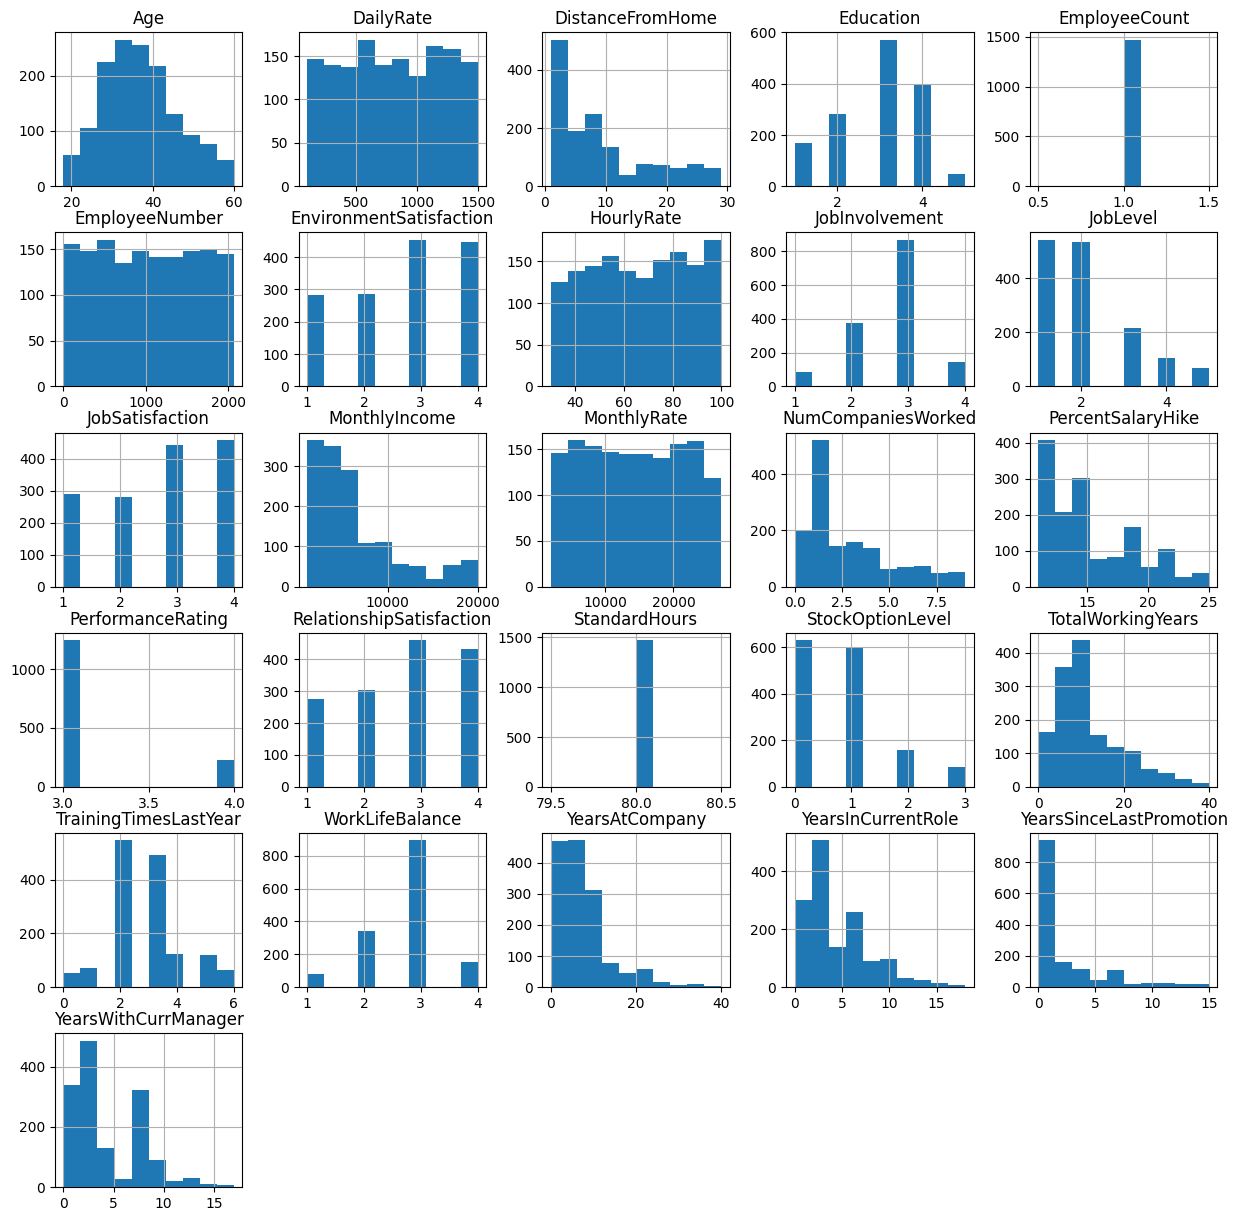

In [17]:
df.hist(figsize=(15,15))
plt.show()

*Informações que conseguimos tirar dessas visualizaçõa*
> - StandardHours e EmployeeCount são variaveis que asssumem apenas um valor para todos os dados
> - EmployeeNumber pode ser o identificador dado a cada fúncionario, por isso uma distribuição quase uniforme
> - Temos algumas colunas que apresentam valores qualitativos como WorkLifeBalance e StockOptionLevel
> - A distribuição de anos na empresa tem uma calda longa a esquerda o que mostra que a maioria dos empregados tem menos de 20 anos na empresa
> - A distribuição dos campos YearsInCurrentRole e YearsSinceLastPromotion são assimetricas a direita o que mostra que temos evolução constante de carreira para a maioria dos funcionarios

### Distribuição pela target

In [49]:
def visualizacoes(data: pd.DataFrame, x : str, hue: str):

    sns.set_style("ticks")
    sns.set_palette("viridis")

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=data, x=x, hue=hue, kde=True, ax=axs[0])
    axs[0].set_title(f'Distribuição {x} para {hue}')
    axs[0].set_xlabel(f'{x}')
    axs[0].set_ylabel('Incidências')

    sns.boxplot(data=data, x=x, hue=hue, ax=axs[1])
    axs[1].set_title(f'Distribuição {x} para {hue}')
    axs[1].set_xlabel(f'{x}')
    axs[1].set_ylabel('Incidências')

    plt.tight_layout()

    plt.show()

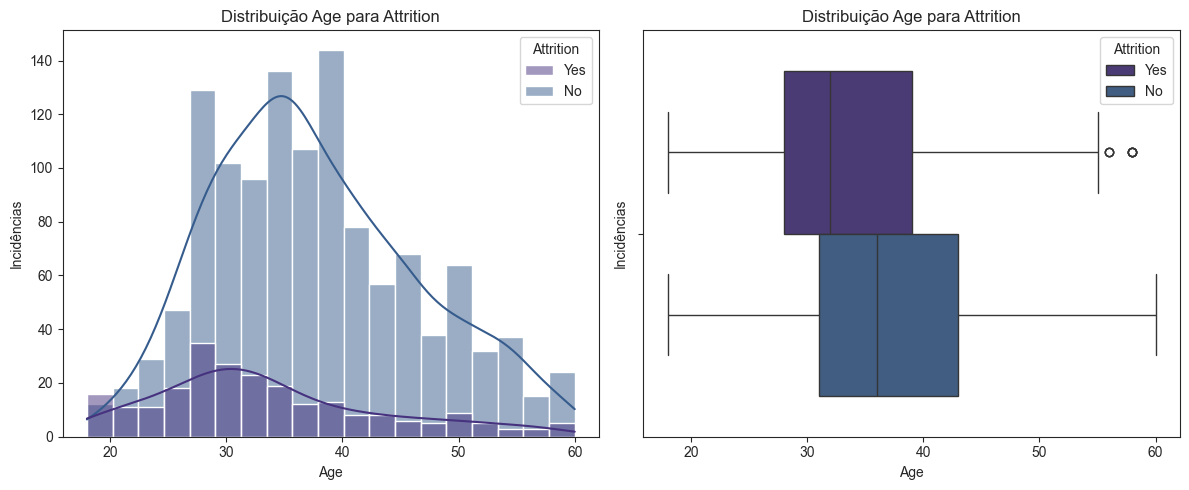

In [50]:
visualizacoes(df, 'Age', 'Attrition')